# Project 2: More Data, More Visualizations

For this project, the students will:
* find a data set of their choosing
* get approval from the instructor to use that data set
* upon approval, find another (related) data set
* join the new data set with the original one to create an "enriched" data set
* perform an open-ended Exploratory Data Analysis (EDA) on the enriched data set

Regarding the last bullet, "open-ended" means the student chooses the EDA that is performed. The student should have at least three types of data analysis (e.g., mean, standard deviation) and at least three types of graphs (e.g., historgram, bar graph). The student will explain why those variables were chosen for numerical or graphical analysis. Finally, the student will make note of any unusual values for any variable that is analyzed.

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [172]:
#Importing work data
df1= pd.read_excel("Johnson.gwonda project data.xlsx")
df2= pd.read_excel("Additional Project Data.xlsx")

print(df1)
print(df2)


          Activation Date  Account ID  Loan Amount              Branch  \
0     2022-07-27 07:33:52     4438845       3000.0             MOMBASA   
1     2019-01-08 11:33:31     8046786       3000.0  Applewood B Listed   
2     2021-05-17 13:49:05     5279090       3000.0           WESTLANDS   
3     2019-03-08 13:40:18     9056511       3000.0                MERU   
4     2023-05-20 05:53:48     9549279       3000.0               BOMET   
...                   ...         ...          ...                 ...   
85661 2017-02-10 00:00:00     4008581     170000.0              NAKURU   
85662 2017-02-23 00:00:00     8008580     230000.0          Apple Wood   
85663 2017-03-23 00:00:00     7008570     475000.0              NAKURU   
85664 2017-02-07 00:00:00     3001334     104000.0               Legal   
85665 2022-04-26 14:55:41     9748954     180000.0           KITENGELA   

      Gender (Client)  
0                Male  
1                Male  
2                Male  
3              

In [173]:
#Joined Data
Product_sales= pd.merge(df1,df2, on='Account ID')
Product_sales.iloc[:5]

,Activation Date,Account ID,Loan Amount,Branch,Gender (Client),Account State,Birth Date (Client)
0,2022-07-27 07:33:52,4438845,3000.0,MOMBASA,Male,Closed,1980-02-02 00:00:00
1,2019-01-08 11:33:31,8046786,3000.0,Applewood B Listed,Male,Closed,1978-01-01 00:00:00
2,2021-05-17 13:49:05,5279090,3000.0,WESTLANDS,Male,Closed,1999-05-04 00:00:00
3,2019-03-08 13:40:18,9056511,3000.0,MERU,Male,Closed,1983-01-01 00:00:00
4,2023-05-20 05:53:48,9549279,3000.0,BOMET,Male,Closed,1992-02-01 00:00:00


In [174]:
#Search for missing values
Product_sales.isnull().sum()

Activation Date         0
Account ID              0
Loan Amount             0
Branch                  0
Gender (Client)         0
Account State           0
Birth Date (Client)    15
dtype: int64

In [175]:
#Search for duplicates
Product_sales.duplicated().sum()

3

In [176]:
#Dropping Duplicates
Product_sales.drop_duplicates(inplace=True)
Product_sales.duplicated().sum()


0

In [177]:
#Calculating Client Age
import datetime as DT
import io
Product_sales['Birth Date (Client)'] = pd.to_datetime(Product_sales['Birth Date (Client)'], errors='coerce')
now = pd.Timestamp('now')
Product_sales['age'] = (now - Product_sales['Birth Date (Client)']).astype('<m8[Y]') 
Product_sales.isna().sum()

Activation Date         0
Account ID              0
Loan Amount             0
Branch                  0
Gender (Client)         0
Account State           0
Birth Date (Client)    16
age                    16
dtype: int64

In [178]:
#Classifing Age groups

def age_set(row):

    if row <= 30:
        result = '18-30 years'
    elif row <= 40:
        result = '31-40 years'
    elif row <= 50:
        result = '41-50 years'
    else:
        result = 'Above 50 years'
    return result

Product_sales['age_set'] = Product_sales['age'].apply(age_set)
Product_sales.iloc[:5]


,Activation Date,Account ID,Loan Amount,Branch,Gender (Client),Account State,Birth Date (Client),age,age_set
0,2022-07-27 07:33:52,4438845,3000.0,MOMBASA,Male,Closed,1980-02-02,43.0,41-50 years
1,2019-01-08 11:33:31,8046786,3000.0,Applewood B Listed,Male,Closed,1978-01-01,45.0,41-50 years
2,2021-05-17 13:49:05,5279090,3000.0,WESTLANDS,Male,Closed,1999-05-04,24.0,18-30 years
3,2019-03-08 13:40:18,9056511,3000.0,MERU,Male,Closed,1983-01-01,40.0,31-40 years
4,2023-05-20 05:53:48,9549279,3000.0,BOMET,Male,Closed,1992-02-01,31.0,31-40 years


In [179]:
#Classifing Loan groups

def Loan_class(row):

    if row <= 50000:
        result = 'Less than 50K'
    elif row <= 250000:
        result = '51K-250K'
    elif row <= 750000:
        result = '251K-750K'
    elif row <= 1000000:
        result = '751K-1M'
    elif row <= 1500000:
        result = '1M-1.5M'
    else:
        result = 'Above 1.5M'
    return result

Product_sales['Loan Class'] = Product_sales['Loan Amount'].apply(Loan_class)
Product_sales.iloc[:5]

,Activation Date,Account ID,Loan Amount,Branch,Gender (Client),Account State,Birth Date (Client),age,age_set,Loan Class
0,2022-07-27 07:33:52,4438845,3000.0,MOMBASA,Male,Closed,1980-02-02,43.0,41-50 years,Less than 50K
1,2019-01-08 11:33:31,8046786,3000.0,Applewood B Listed,Male,Closed,1978-01-01,45.0,41-50 years,Less than 50K
2,2021-05-17 13:49:05,5279090,3000.0,WESTLANDS,Male,Closed,1999-05-04,24.0,18-30 years,Less than 50K
3,2019-03-08 13:40:18,9056511,3000.0,MERU,Male,Closed,1983-01-01,40.0,31-40 years,Less than 50K
4,2023-05-20 05:53:48,9549279,3000.0,BOMET,Male,Closed,1992-02-01,31.0,31-40 years,Less than 50K


In [180]:
#Basic look at data with various metrics

Mean_age= Product_sales['age'].mean()
Mean_Loan_Amount= Product_sales['Loan Amount'].mean()
Total_Sales = Product_sales['Loan Amount'].sum()
Max_Age = Product_sales['age'].max()
Min_Age = Product_sales['age'].min()
Std_dev =Product_sales['Loan Amount'].std()



In [181]:

print(Mean_age)
print(Mean_Loan_Amount)
print(Total_Sales)
print(Max_Age)
print(Min_Age)
print(Product_sales['Gender (Client)'].value_counts())
print(Std_dev)

45.34133830459803
231488.57314231468
19995751459.46
123.0
-63.0
Male      69582
Female    16797
Name: Gender (Client), dtype: int64
322057.7581600535


There exists wrong data in the Birth date column thus skewing the data. Data clean up is recommended.

In [182]:

# Group by "Branch" and calculate total loan amount, count of Account ID, and average loan amount
summary_table = Product_sales.groupby('Branch').agg({
    'Loan Amount': ['sum', 'mean'],
    'Account ID': 'count'
}).reset_index()

# Flatten multi-level columns
summary_table.columns = ['Branch', 'Total Loan Amount', 'Average Loan Amount', 'Count of Account ID']

# Display the summary table
summary_table.iloc[:5]

,Branch,Total Loan Amount,Average Loan Amount,Count of Account ID
0,APPLE WOOD,7.026857e+06,250959.185714,28
1,APPLEWOOD,2.093704e+08,228820.096710,915
2,Apple Wood,1.662905e+09,250853.117161,6629
3,Applewood B Listed,1.143533e+09,291494.610622,3923
4,BOMET,5.631522e+07,204782.603527,275


In [183]:
# Group by "Gender (Client)" and calculate total loan amount, count of Account ID, and average loan amount
summary_table_2 = Product_sales.groupby('Gender (Client)').agg({
    'Loan Amount': ['sum', 'mean'],
    'Account ID': 'count'
}).reset_index()

# Flatten multi-level columns
summary_table_2.columns = ['Gender', 'Total Loan Amount', 'Average Loan Amount', 'Count of Account ID']

# Display the summary table
print(summary_table_2)

   Gender  Total Loan Amount  Average Loan Amount  Count of Account ID
0  Female       3.873372e+09        230599.024303                16797
1    Male       1.612238e+10        231703.309020                69582


Text(0.5, 1.0, 'Distribution of Age Sets with Data Labels')

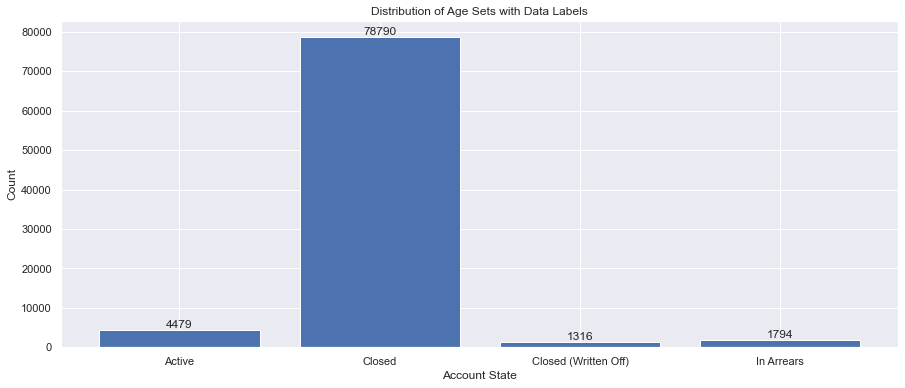

In [184]:

# Group by "age_set" and count the occurrences
Account_state_counts = Product_sales['Account State'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
# Create a bar graph
plt.bar(Account_state_counts.index, Account_state_counts)

# Add data labels to each bar
for i, value in enumerate(Account_state_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Account State')
plt.ylabel('Count')
plt.title('Distribution of Age Sets with Data Labels')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Less than 50K'),
  Text(1, 0, '51K-250K'),
  Text(2, 0, '251K-750K'),
  Text(3, 0, '751K-1M'),
  Text(4, 0, '1M-1.5M'),
  Text(5, 0, 'Above 1.5M')])

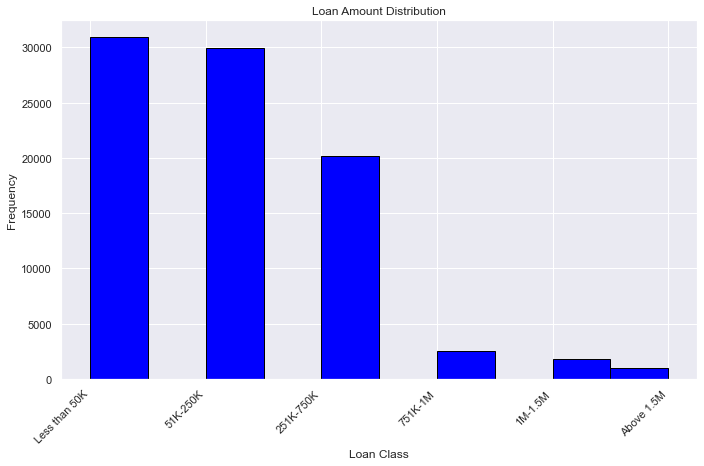

In [185]:
# Create a histogram with loan classes
plt.figure(figsize=(10, 6))
plt.hist(Product_sales.sort_values(by='Loan Amount')['Loan Class'], bins=10, color='blue', edgecolor='black')
# Add labels and title
plt.xlabel('Loan Class')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

Majority of clients Take a facility that is below 250,000

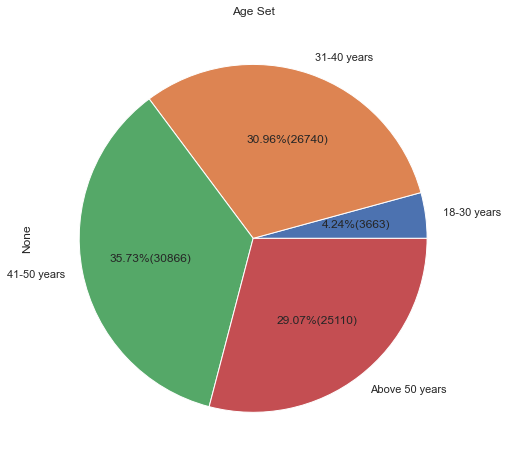

In [186]:
#Age set Pie chart
days = Product_sales.groupby('age_set').size()

sns.set()
days.plot(kind='pie', title='Age Set', figsize=[8,8],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*days.sum()))
plt.show()

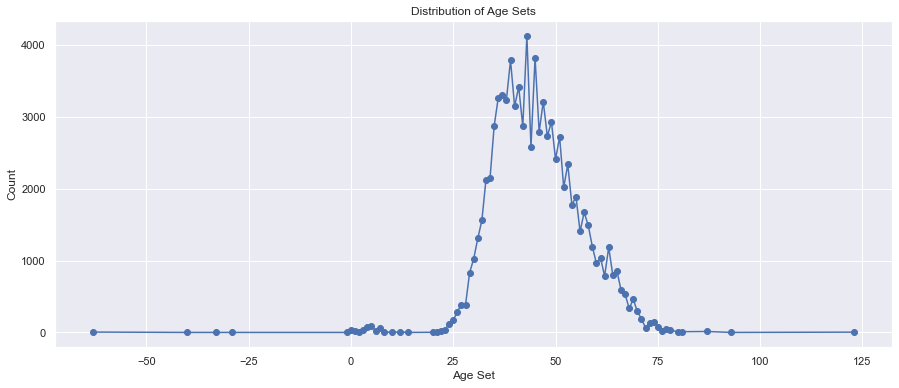

In [187]:
# Group by "age_set" and count the occurrences
age_set_counts = Product_sales['age'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
# Create a line graph
plt.plot(age_set_counts.index, age_set_counts, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Age Set')
plt.ylabel('Count')
plt.title('Distribution of Age Sets')

# Show the plot
plt.show()

The relative clients age is between 30 and 50 Years

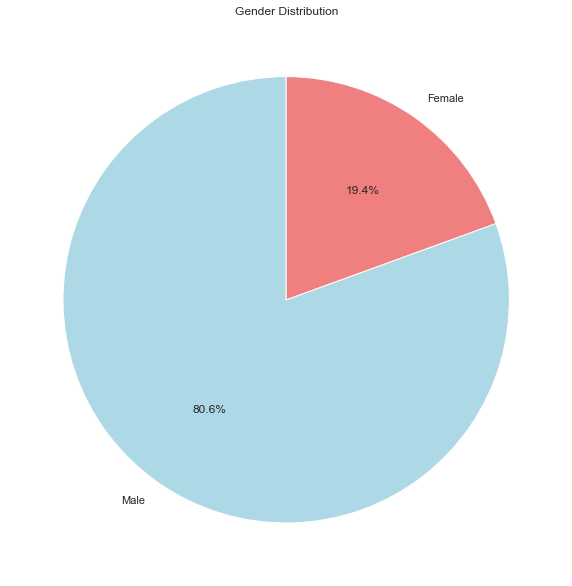

In [188]:

gender_counts = Product_sales['Gender (Client)'].value_counts()
plt.figure(figsize=(10, 20))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

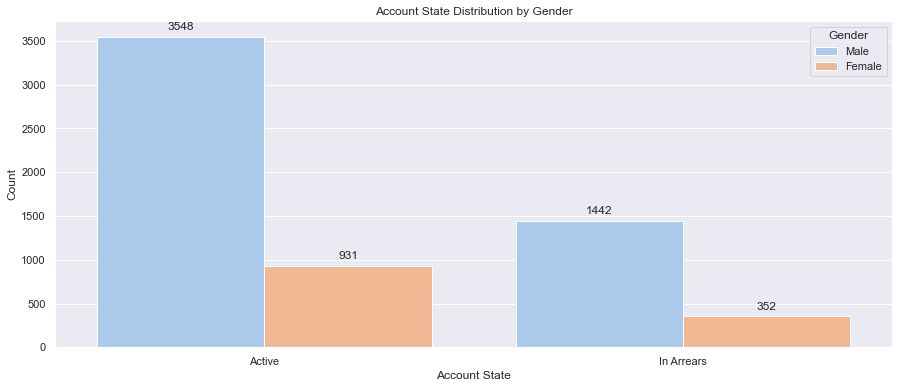

In [189]:

# Filter the data for 'Active' and 'In arrears'
filtered_df = Product_sales[Product_sales['Account State'].isin(['Active', 'In Arrears'])]

# Create a count plot using seaborn
plt.figure(figsize=(15, 6))
ax=sns.countplot(x='Account State', hue='Gender (Client)', data=filtered_df, palette='pastel')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Account State')
plt.ylabel('Count')
plt.title('Account State Distribution by Gender')

# Add a legend
plt.legend(title='Gender')

# Show the plot
plt.show()

Male clients are the biggest number of clients. They also contribute to the highest number of delinquent clients.

In [190]:
Product_sales.to_excel('Product_Sales.xlsx', index=False)
pd.read_excel("Product_Sales.xlsx")


,Activation Date,Account ID,Loan Amount,Branch,Gender (Client),Account State,Birth Date (Client),age,age_set,Loan Class
0,2022-07-27 07:33:52,4438845,3000.0,MOMBASA,Male,Closed,1980-02-02,43.0,41-50 years,Less than 50K
1,2019-01-08 11:33:31,8046786,3000.0,Applewood B Listed,Male,Closed,1978-01-01,45.0,41-50 years,Less than 50K
2,2021-05-17 13:49:05,5279090,3000.0,WESTLANDS,Male,Closed,1999-05-04,24.0,18-30 years,Less than 50K
3,2019-03-08 13:40:18,9056511,3000.0,MERU,Male,Closed,1983-01-01,40.0,31-40 years,Less than 50K
4,2023-05-20 05:53:48,9549279,3000.0,BOMET,Male,Closed,1992-02-01,31.0,31-40 years,Less than 50K
...,...,...,...,...,...,...,...,...,...,...
86374,2017-02-10 00:00:00,4008581,170000.0,NAKURU,Male,Closed,1966-08-17,57.0,Above 50 years,51K-250K
86375,2017-02-23 00:00:00,8008580,230000.0,Apple Wood,Male,Closed,1982-08-16,41.0,41-50 years,51K-250K
86376,2017-03-23 00:00:00,7008570,475000.0,NAKURU,Male,Closed,1978-01-01,45.0,41-50 years,251K-750K
86377,2017-02-07 00:00:00,3001334,104000.0,Legal,Male,Closed (Written Off),1960-01-01,63.0,Above 50 years,51K-250K
